In [31]:
# import necessary packages
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [32]:
# define number of qubits
N = 4

In [33]:
# create qubit register with all states being at equal probability of 0 state with amplitude 1/sqrt(2^N)
def qubit_register(N):
    
    # initialize column vector
    psi = 1 / np.sqrt(2**N) * np.zeros((2**N, 1), dtype=complex)
    psi[0] = 1
    
    return psi

In [34]:
# measure probability of each basis state
def measure_Sz(state):
    
    probabilities = np.abs(state)**2
    
    # select a basis state randomly according to the probabilities
    measurement = np.random.choice(np.arange(len(state)), p=probabilities.ravel())
    
    return measurement

In [35]:
# perform Hadamard transformation for any N
def hadamard_transform(N):
    # define the initial Hadamard matrix
    hadamard_initial = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])

    # number of iterations for the transformation
    num_iterations = N - 1

    # initialize the resulting tensor product matrix
    hadamard_result = hadamard_initial

    # perform tensor product iteratively
    for i in range(num_iterations):
        hadamard_result = np.kron(hadamard_initial, hadamard_result)
        
    return hadamard_result

In [36]:
# creates the oracle matrix
def create_oracle(N, target):
    # creates an identity matrix of 1's on the diagonal
    oracle = np.eye(2**N)

    # sets a -1 
    oracle[target - 1, target - 1] = -1

    return oracle

In [37]:
# print the register
psi = qubit_register(N)
print("The qubit register is:\n", psi)


The qubit register is:
 [[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


In [38]:
# print the basis state
measurement = measure_Sz(psi)
print("The measured basis state is:\n|",np.binary_repr(measurement, width = N),">")

The measured basis state is:
| 0000 >


In [39]:
# print the Hadamard transformed
hadamard = hadamard_transform(N)
print("The resulting Hadamard is:\n", hadamard)

The resulting Hadamard is:
 [[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
   0.25  0.25  0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25
   0.25 -0.25  0.25 -0.25]
 [ 0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25
   0.25  0.25 -0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25
   0.25 -0.25 -0.25  0.25]
 [ 0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25
  -0.25 -0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25  0.25 -0.25
  -0.25  0.25 -0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25 -0.25 -0.25
  -0.25 -0.25  0.25  0.25]
 [ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25  0.25 -0.25 -0.25  0.25
  -0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25
  -0.25 -0.25 -0.25 -0.25]
 [ 0.25 -0.25  0.25 -0.25  0.25 -0.25  0.25 -0.25 -0.25  0.25 -

In [40]:
# checks the Hadamard is correct by dividing by the amplitude
hadamard_check = hadamard / (1 / (2**(N/2)))
print("The checked Hadamard without the amplitude is:\n", hadamard_check)

The checked Hadamard without the amplitude is:
 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
 [ 1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.]
 [ 1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.]
 [ 1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.]
 [ 1.  1. -1. 

In [41]:
# sets the target state so that all digits are 1,1,1...1,0
target = (2**N) - 1

# converts the state to an array
target_state = [1] * (N - 1)
target_state.append(0)

# converts the array to a string for ease of printing
target_state_print = ''.join(str(x) for x in target_state)

print("The target state is:\n", "|", target_state_print, ">")

The target state is:
 | 1110 >


In [42]:
# creates the oracle matrix
oracle_state = create_oracle(N, target)
print(oracle_state)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. 

In [43]:
def diffusion_operator(N):
    # Define superposition state
    s = np.zeros((2**N, 1), dtype=complex) #/ np.sqrt(2**N)
    s[0][0]=1
    
    #print(s)
    #print(s.T.conj())
    
    
    # Compute |s><s|
    ss_dagger = np.dot(s,s.T.conj())
    # ID Matric
    identity = np.eye(2**N)
    # Diffusion Operator
    diffusion =  (2 * ss_dagger) - identity 
    return diffusion
diffuse= diffusion_operator(3)
print(diffuse)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [44]:
#This is a budget diffusion operator, because only works for N=3 
budgetDiffusion= np.eye((2**N))
budgetDiffusion[0][0] =-1
print(budgetDiffusion)

[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

The amount of times the loop will run:
 3


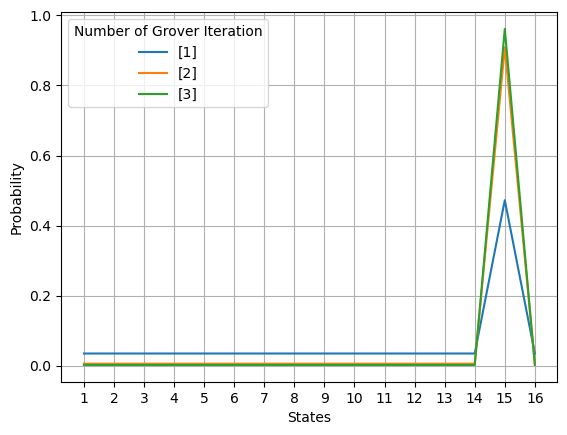

In [45]:
#qubit register gives us the intiial state
psi = qubit_register(N)
#print(psi)

#Apply hadamard Tranform
hTransform=hadamard_transform(N)
psi2=  np.matmul(hTransform,psi)
#print(psi2)

#Grover iteration time
oracle= create_oracle(N,target)
diffOpp = diffusion_operator(N)
#print(diffOpp)

check = np.dot(hTransform,diffOpp)
check2 = np.dot(hTransform,check)

#print((np.round(check2)))

loopAmount=((np.pi/4) * np.sqrt(2**N))
loopAmount= loopAmount.astype(int)
print("The amount of times the loop will run:\n", loopAmount)

probs = []
states = list(range(1, 1 + (2**N)))

for i in range(0,loopAmount):
    grover1 = np.matmul(oracle,psi2)
    grover2 = np.matmul(hTransform,grover1)
    grover3 = np.matmul(diffOpp,grover2)
    grover4 = np.matmul(hTransform,grover3)
    psi2 = grover4
    answer = np.abs(psi2)**2
    probs.append(answer)

    plt.plot(states, answer, label = [i + 1])
    plt.xticks(states)
    plt.xlabel("States")
    plt.ylabel("Probability")
    plt.legend()

plt.legend(title = "Number of Grover Iteration")
plt.grid()
plt.show()